# Create Binary Raster

**Author**: Bryce A Young  
**Date Created**: 2024-09-04  
**Last Modified**: 2024-09-04

#### Overview
This notebook creates a binary raster from a DEM. This is so the raster can be turned into a ploygon. The process is simple, but the principles can be used for more complex perations later.

#### Step 0: Import Libraries

In [1]:
import numpy as np
import rasterio as rio

#### Step 1: Load in the raster to be converted

In [2]:
file_path = 'F:/_BRYCE/LiDAR/Ouray_County/fishnet_9/usgs_opr_co_sanluisjuanmiguel_2020_d20_dem_13s_bc_5921.tif'

with rio.open(file_path) as src:
    dem = src.read(1)           # Store as numpy array
    meta = src.meta             # Store metadata

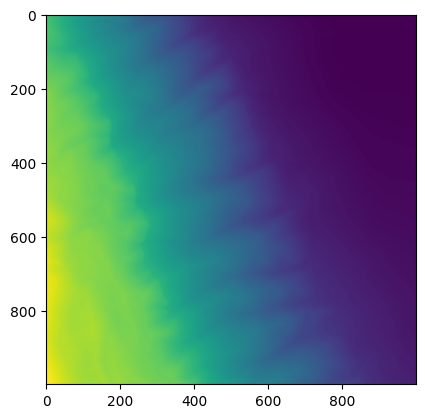

In [3]:
# Preview data
import matplotlib.pyplot as plt

plt.imshow(dem)

In [4]:
print(meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999999.0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_wkt('LOCAL_CS["NAD83(2011) / UTM zone 13N + NAVD88 height - US Geoid Model of 2018",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(1.0, 0.0, 259000.0,
       0.0, -1.0, 4222000.0)}


#### Step 2: Create an Identical Array of Ones

In [8]:
binary_2020_5921_tile = np.ones_like(dem)    # Create an array of ones matching shape of `dem`
binary_2020_5921_tile.shape == dem.shape     # Verify dimensions (returns 'True' if done correctly)

True

#### Step 3: Update the metadata and save to new raster file

In [16]:
# Modify the dtype and nodata values in  the copied metadata
meta.update(dtype = 'uint8', nodata = 0)
print(meta)                 # Verify


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_wkt('LOCAL_CS["NAD83(2011) / UTM zone 13N + NAVD88 height - US Geoid Model of 2018",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(1.0, 0.0, 259000.0,
       0.0, -1.0, 4222000.0)}


In [13]:
# Convert array to uint8
binary_2020_5921_tile = binary_2020_5921_tile.astype(np.uint8)

In [17]:
output_file_path = 'F:/_BRYCE/LiDAR/Ouray_County/other_assets/binary_2020_5921_tile.tif'

with rio.open(output_file_path, 'w', **meta) as dst:
    dst.write(binary_2020_5921_tile, 1)

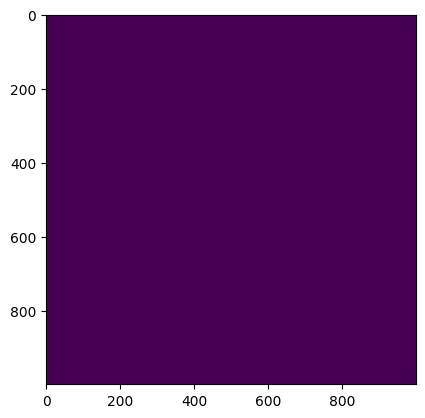

In [18]:
plt.imshow(binary_2020_5921_tile)

In [19]:
meta['crs']

CRS.from_wkt('LOCAL_CS["NAD83(2011) / UTM zone 13N + NAVD88 height - US Geoid Model of 2018",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [20]:
meta['transform']

Affine(1.0, 0.0, 259000.0,
       0.0, -1.0, 4222000.0)

In [21]:
meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0,
 'width': 1000,
 'height': 1000,
 'count': 1,
 'crs': CRS.from_wkt('LOCAL_CS["NAD83(2011) / UTM zone 13N + NAVD88 height - US Geoid Model of 2018",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(1.0, 0.0, 259000.0,
        0.0, -1.0, 4222000.0)}